In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

### Customer Data

In [2]:
cust=pd.read_csv("Customers.csv")

In [3]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


### Taking  one column at a time for Analysis :-

##### CustomerID :

In [5]:
cust["CustomerID"].isnull().unique()  #no null value 


array([False])

In [6]:
len(cust["CustomerID"].unique()) #total customers 

200

##### Customer Name :

In [7]:
cust["CustomerName"].isnull().unique() # no null customer 

array([False])

#### Region :

In [8]:
cust["Region"].isnull().sum()  #no null value

0

In [9]:
cust["Region"].unique() #Total Regions

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

#### SignupDate :

In [10]:
cust["SignupDate"].isnull().sum()

0

In [11]:
cust["SignupDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: SignupDate
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [12]:
cust["SignupDate"]=pd.to_datetime(cust["SignupDate"]) #SignupDate Column is in Object DType convert into DateTime 

In [13]:
cust["SignupDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: SignupDate
Non-Null Count  Dtype         
--------------  -----         
200 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 KB


## EDA : 

#### Distribution of Customers Across Regions

In [16]:
# Count customers by region
region_distribution = cust['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Number of Customers']
fig = px.bar(
    region_distribution,
    x='Region',
    y='Number of Customers',
    color='Number of Customers',
    text='Number of Customers',
    color_continuous_scale='Sunset',
    title='Distribution of Customers Across Regions',
    labels={'Number of Customers': 'Count', 'Region': 'Region'},
)
fig.update_traces(texttemplate='%{text}', textposition='outside', opacity=0.9)  
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Customers",
    title_font=dict(size=18, family='Arial'),
    xaxis=dict(title_font=dict(size=14), tickangle=-45),
    yaxis=dict(title_font=dict(size=14)),
    margin=dict(l=40, r=40, t=50, b=40),
    template="plotly_white"
)

fig.show()


#### Signup Trends Over Time

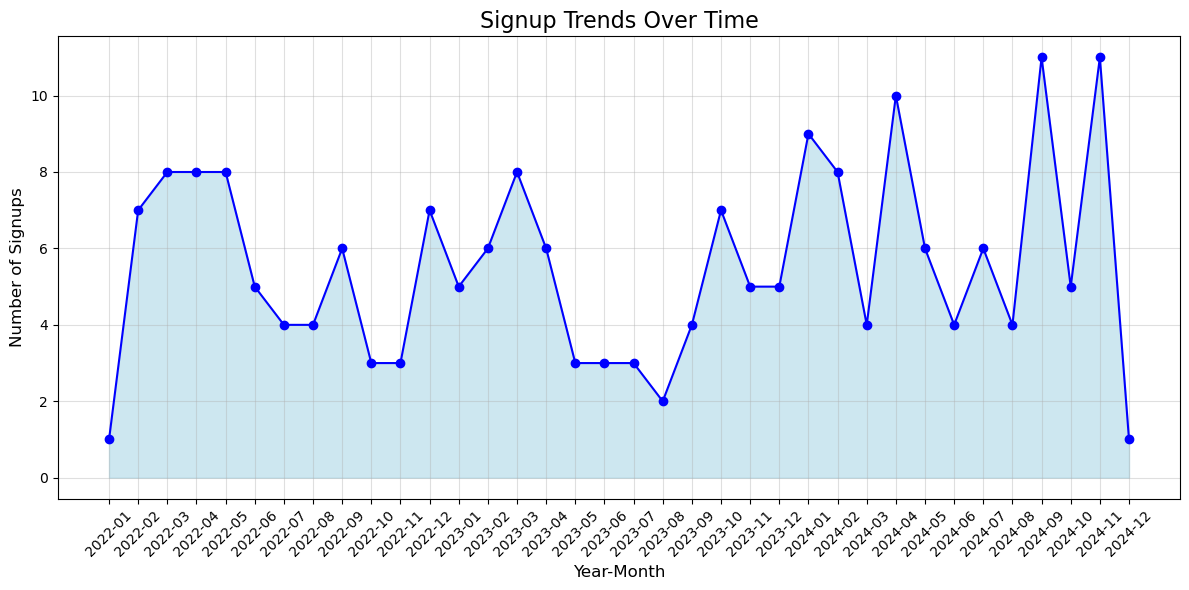

In [19]:
cust['Year'] = cust['SignupDate'].dt.year
cust['Month'] = cust['SignupDate'].dt.month
signup_trends = cust.groupby(['Year', 'Month']).size().reset_index(name='CustomerCount')
signup_trends['YearMonth'] = signup_trends['Year'].astype(str) + '-' + signup_trends['Month'].astype(str).str.zfill(2)
plt.figure(figsize=(12, 6))
plt.fill_between(signup_trends['YearMonth'], signup_trends['CustomerCount'], color='lightblue', alpha=0.6)
plt.plot(signup_trends['YearMonth'], signup_trends['CustomerCount'], marker='o', color='blue') 
plt.title('Signup Trends Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.4)
plt.tight_layout() 
plt.show()



### Products Data

In [20]:
prd=pd.read_csv("Products.csv")

In [21]:
prd.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [22]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [24]:
prd["ProductID"].isnull().sum()

0

In [25]:
prd["ProductName"].isnull().sum()

0

In [26]:
prd["Category"].isnull().sum()

0

In [27]:
prd["Price"].isnull().sum()

0

In [28]:
prd["Category"].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [30]:
len(prd["ProductName"].unique()) #Total Products

66

#### Product Distribution by Category

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\704103259.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




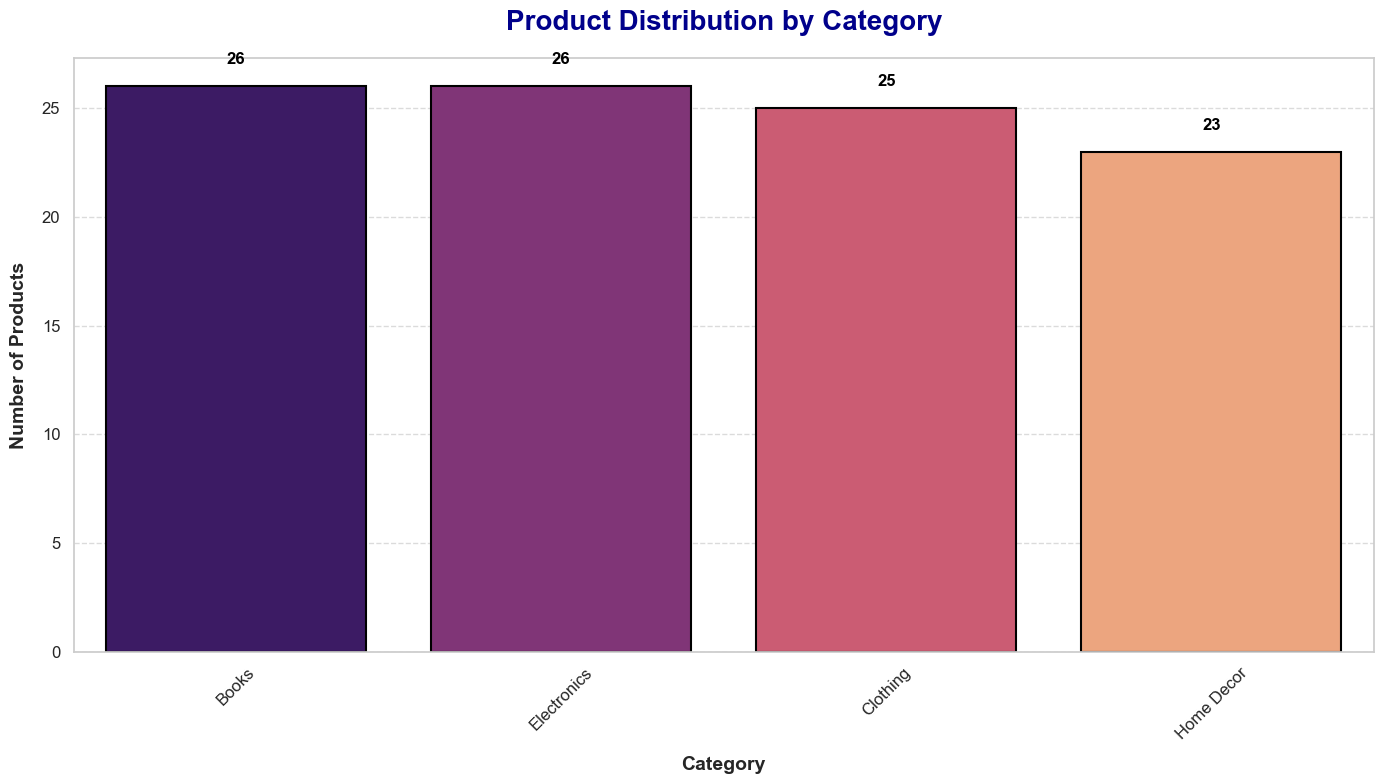

In [33]:
category_distribution = prd['Category'].value_counts()
category_df = category_distribution.reset_index()
category_df.columns = ['Category', 'ProductCount']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(
    data=category_df,
    x='Category',
    y='ProductCount',
    palette="magma",
    edgecolor="black",
    linewidth=1.5
)
plt.title('Product Distribution by Category', fontsize=20, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Category', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Number of Products', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for index, row in category_df.iterrows():
    plt.text(index, row['ProductCount'] + 1, int(row['ProductCount']), 
             ha='center', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Product Distribution by Category

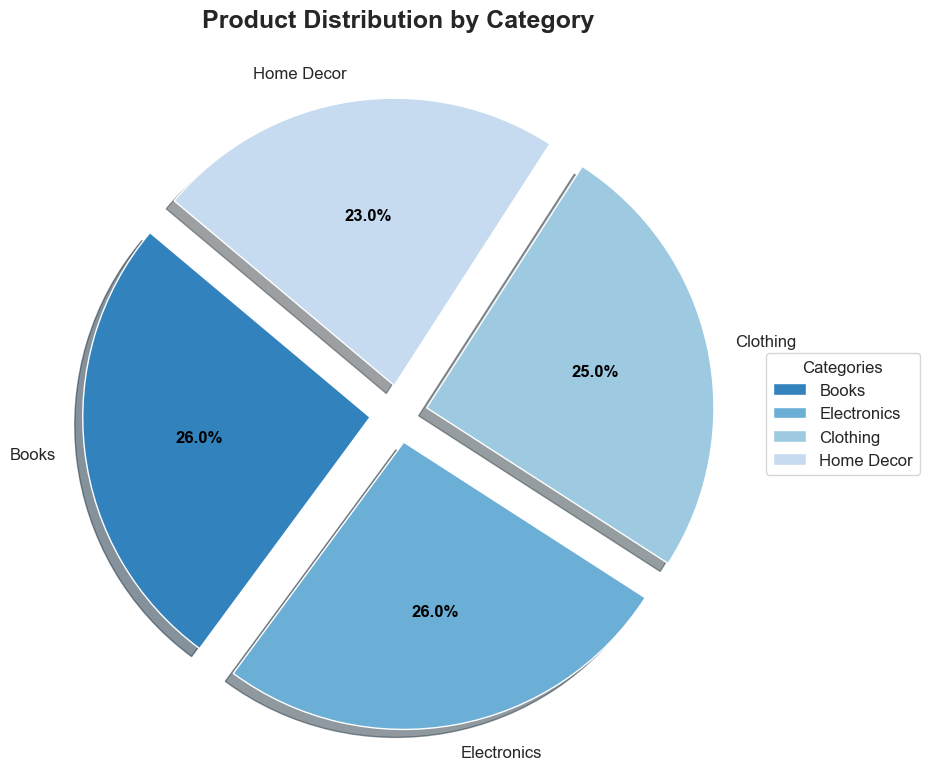

In [36]:
category_distribution = prd['Category'].value_counts()
categories = category_distribution.index
counts = category_distribution.values
colors = plt.cm.tab20c(range(len(categories)))  
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
explode = [0.1] * len(categories)  


wedges, texts, autotexts = ax.pie(
    counts,
    explode=explode,
    labels=categories,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    colors=colors
)


plt.setp(autotexts, size=12, weight="bold", color="black") 
plt.setp(texts, size=12)

ax.set_title("Product Distribution by Category", fontsize=18, fontweight="bold", pad=20)
ax.legend(
    wedges,
    categories,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()


#### Product Category Sales

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\2602052933.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




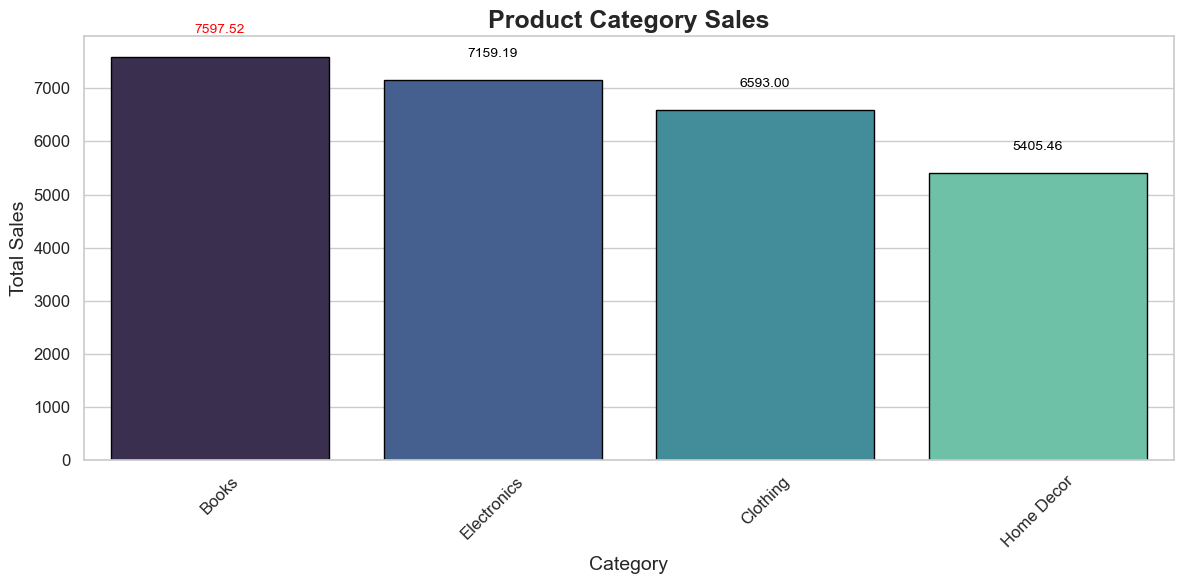

In [37]:
category_sales = prd.groupby('Category')['Price'].sum().sort_values(ascending=False)
highest_category = category_sales.idxmax()
highest_sales = category_sales.max()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako", edgecolor="black")
for i, value in enumerate(category_sales.values):
    color = "red" if category_sales.index[i] == highest_category else "black"
    plt.text(i, value + 0.05 * highest_sales, f"{value:.2f}", ha="center", va="bottom", fontsize=10, color=color)
plt.title("Product Category Sales", fontsize=18, fontweight="bold")
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#### Top-Selling Product in Each Category

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\1496089489.py:38: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



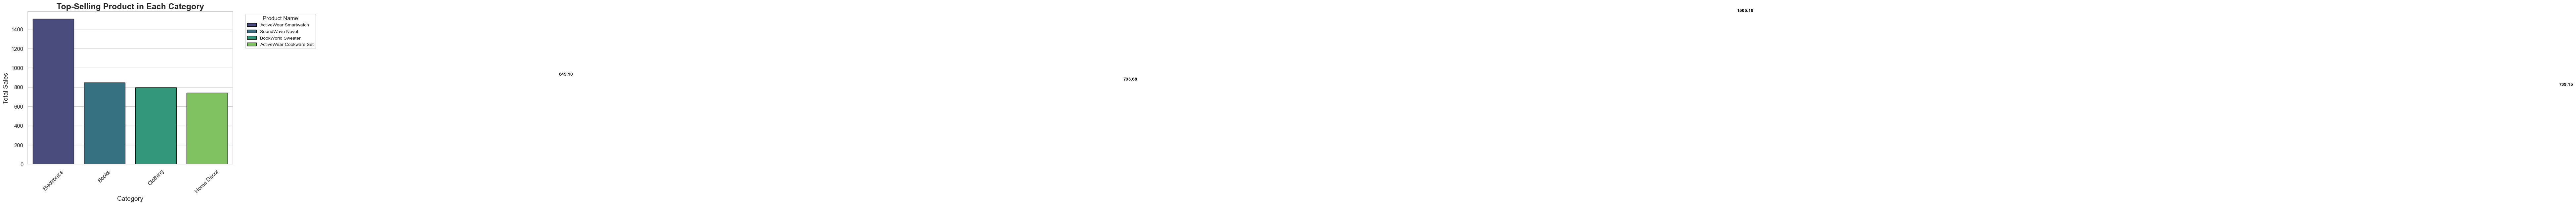

In [ ]:

product_sales = prd.groupby(['Category', 'ProductName'])['Price'].sum().reset_index()
top_products_per_category = product_sales.loc[product_sales.groupby('Category')['Price'].idxmax()]
top_products_per_category = top_products_per_category.sort_values(by='Price', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_products_per_category['Category'], 
    y=top_products_per_category['Price'], 
    hue=top_products_per_category['ProductName'], 
    dodge=False, palette='viridis', edgecolor='black'
)
for i, row in top_products_per_category.iterrows():
    plt.text(
        i, row['Price'] + 0.05 * top_products_per_category['Price'].max(), 
        f"{row['Price']:.2f}", ha="center", fontsize=10, color='black', fontweight='bold'
    )
plt.title("Top-Selling Product in Each Category", fontsize=18, fontweight="bold")
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_15524\1510848913.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




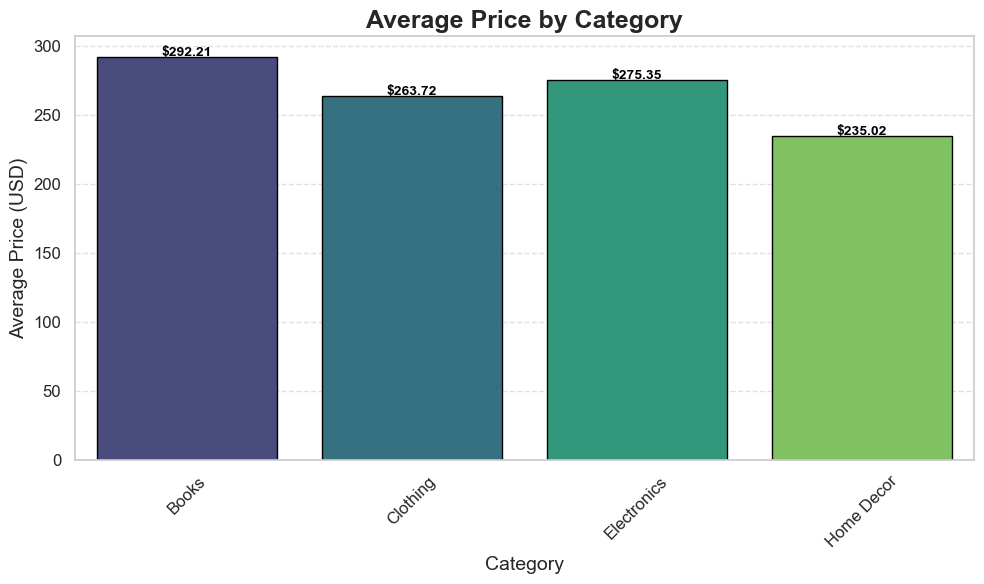

In [ ]:
category_price_stats = prd.groupby('Category')['Price'].agg(['mean', 'sum']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Category', 
    y='mean', 
    data=category_price_stats, 
    palette="viridis", 
    edgecolor="black"
)
for i, row in category_price_stats.iterrows():
    plt.text(i, row['mean'] + 0.5, f"${row['mean']:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')
plt.title('Average Price by Category', fontsize=18, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Top 5 Least & Expensive Products

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\3133526001.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PC\AppData\Local\Temp\ipykernel_15524\3133526001.py:18: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



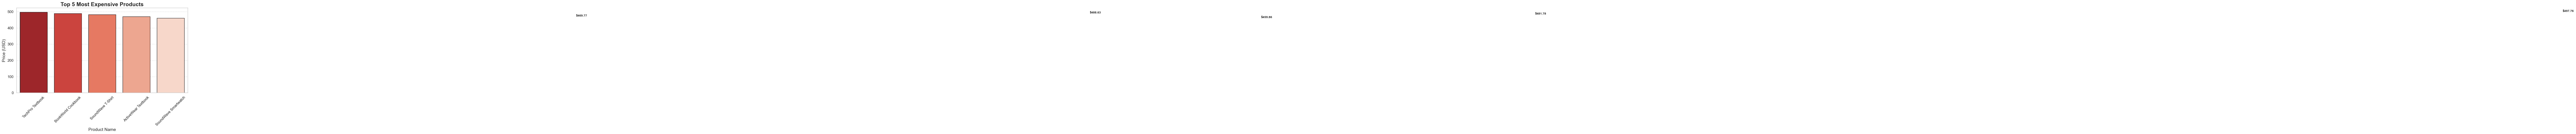

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\3133526001.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PC\AppData\Local\Temp\ipykernel_15524\3133526001.py:39: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



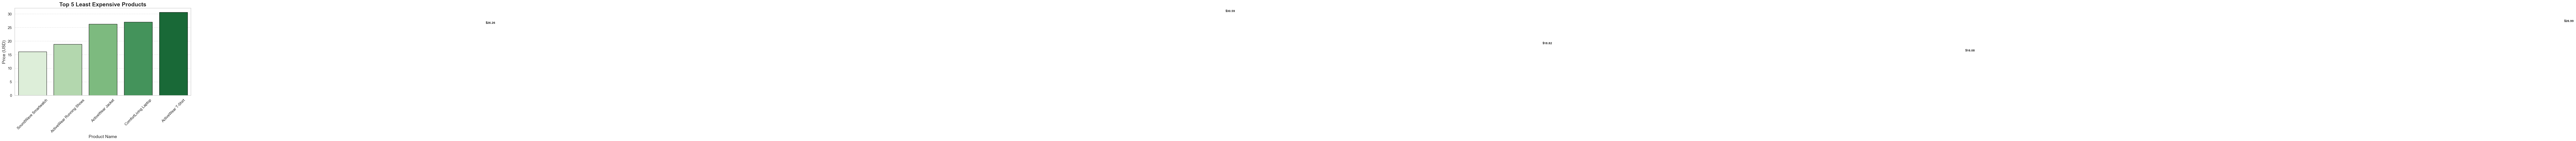

In [45]:
most_expensive = prd.sort_values(by='Price', ascending=False).head(5)
least_expensive = prd.sort_values(by='Price', ascending=True).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=most_expensive['ProductName'], 
    y=most_expensive['Price'], 
    palette='Reds_r', 
    edgecolor='black'
)
for i, row in most_expensive.iterrows():
    plt.text(i, row['Price'] + 1, f"${row['Price']:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.title('Top 5 Most Expensive Products', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot for the least expensive products
plt.figure(figsize=(10, 5))
sns.barplot(
    x=least_expensive['ProductName'], 
    y=least_expensive['Price'], 
    palette='Greens', 
    edgecolor='black'
)

for i, row in least_expensive.iterrows():
    plt.text(i, row['Price'] + 0.1, f"${row['Price']:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.title('Top 5 Least Expensive Products', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Transactions Data :

In [50]:
tr=pd.read_csv("Transactions.csv")

In [51]:
tr.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [52]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [53]:
tr["CustomerID"].isnull().sum()

0

In [56]:
len(tr["CustomerID"].unique())

199

In [54]:
tr["TransactionID"].isnull().sum()

0

#### Top 10 Most Purchased Products

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\70832780.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




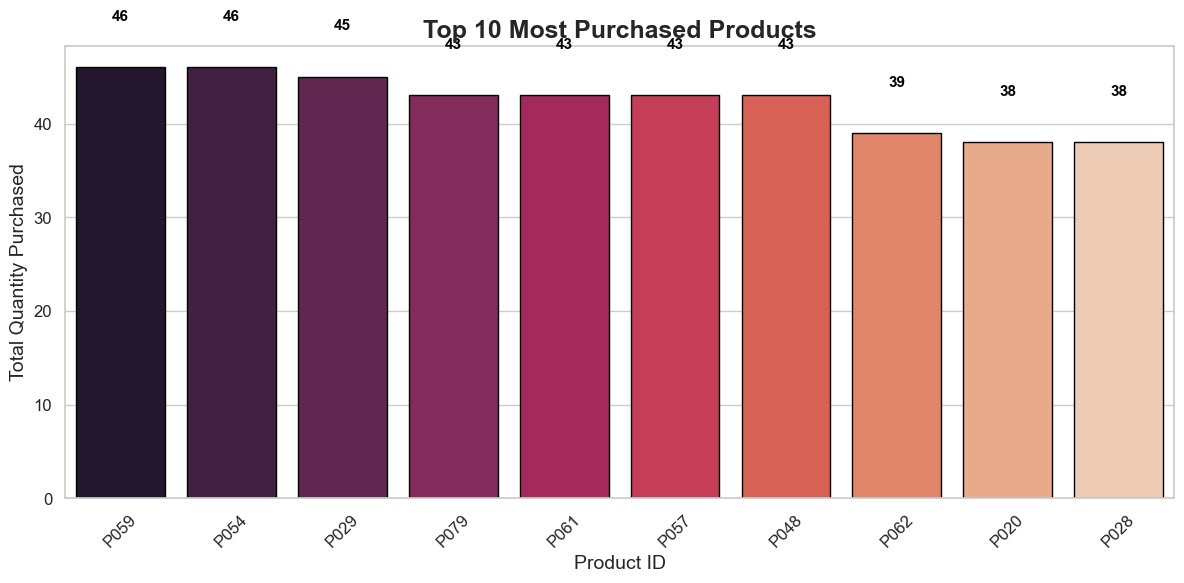

In [57]:
most_purchased_products = tr.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=most_purchased_products.index.astype(str), 
    y=most_purchased_products.values, 
    palette="rocket", 
    edgecolor='black'
)
plt.title('Top 10 Most Purchased Products', fontsize=18, fontweight='bold')
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Total Quantity Purchased', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, value in enumerate(most_purchased_products.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=11, fontweight='bold', color='black')
plt.tight_layout()
plt.show()


#### Top 10 Products by Revenue

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\1858601501.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




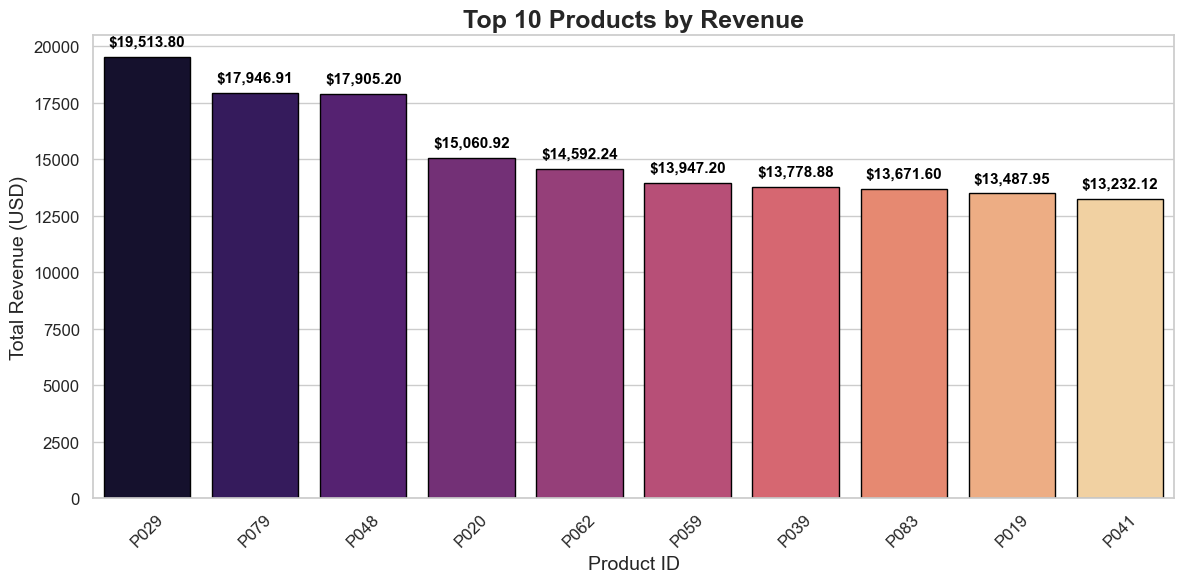

In [65]:
top_revenue_products = tr.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_revenue_products.index.astype(str), 
    y=top_revenue_products.values, 
    palette="magma", 
    edgecolor='black'
)
plt.title('Top 10 Products by Revenue', fontsize=18, fontweight='bold')
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, value in enumerate(top_revenue_products.values):
    plt.text(i, value + 500, f"${value:,.2f}", ha='center', fontsize=11, fontweight='bold', color='black')
plt.tight_layout()
plt.show()


#### Sales Trend Over Time

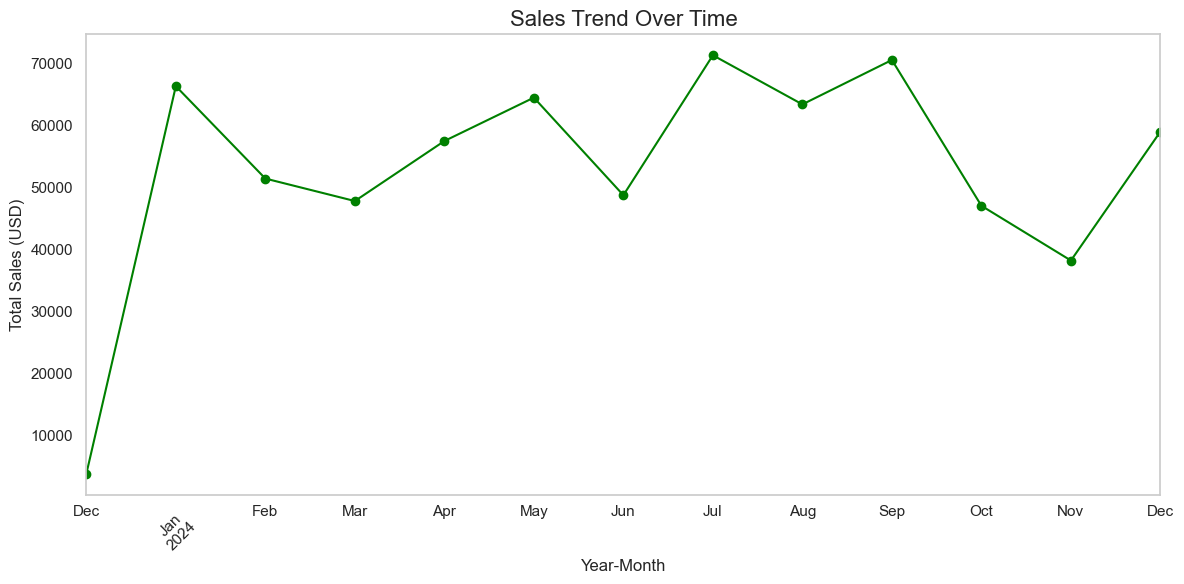

In [59]:
tr['TransactionDate'] = pd.to_datetime(tr['TransactionDate'])
tr['YearMonth'] = tr['TransactionDate'].dt.to_period('M')
monthly_sales = tr.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


#### Transactions by Day of the Week

C:\Users\PC\AppData\Local\Temp\ipykernel_15524\1021240802.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




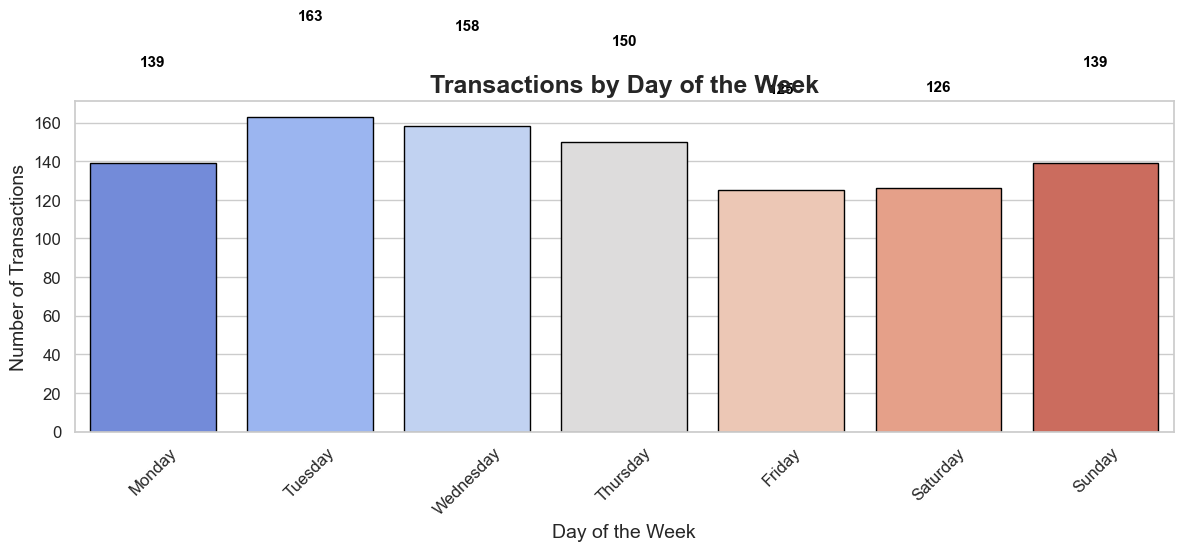

In [60]:
tr['DayOfWeek'] = tr['TransactionDate'].dt.day_name()
transactions_per_day = tr['DayOfWeek'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_per_day = transactions_per_day.reindex(weekday_order)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=transactions_per_day.index,
    y=transactions_per_day.values,
    palette="coolwarm",
    edgecolor="black"
)
plt.title('Transactions by Day of the Week', fontsize=18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, value in enumerate(transactions_per_day.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=11, fontweight='bold', color='black')
plt.tight_layout()
plt.show()


#### Maximum Transactions by Hour of the Day

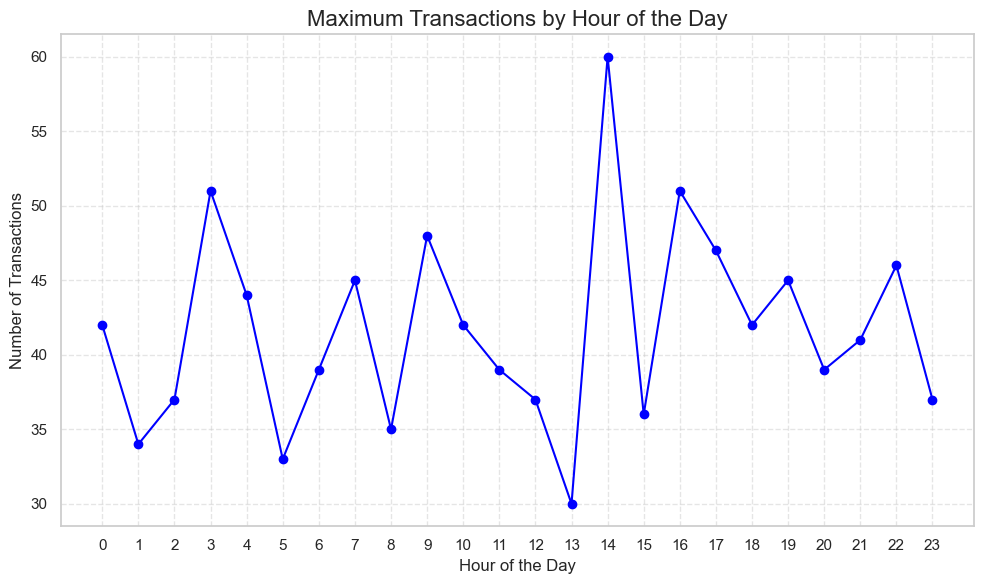

In [ ]:
tr['Hour'] = tr['TransactionDate'].dt.hour
transactions_per_hour = tr['Hour'].value_counts().sort_index()
max_transactions_per_hour = tr.groupby('Hour').size()
plt.figure(figsize=(10, 6))
plt.plot(max_transactions_per_hour.index, max_transactions_per_hour.values, marker='o', linestyle='-', color='blue') # 
plt.title('Maximum Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_15524\3744434739.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




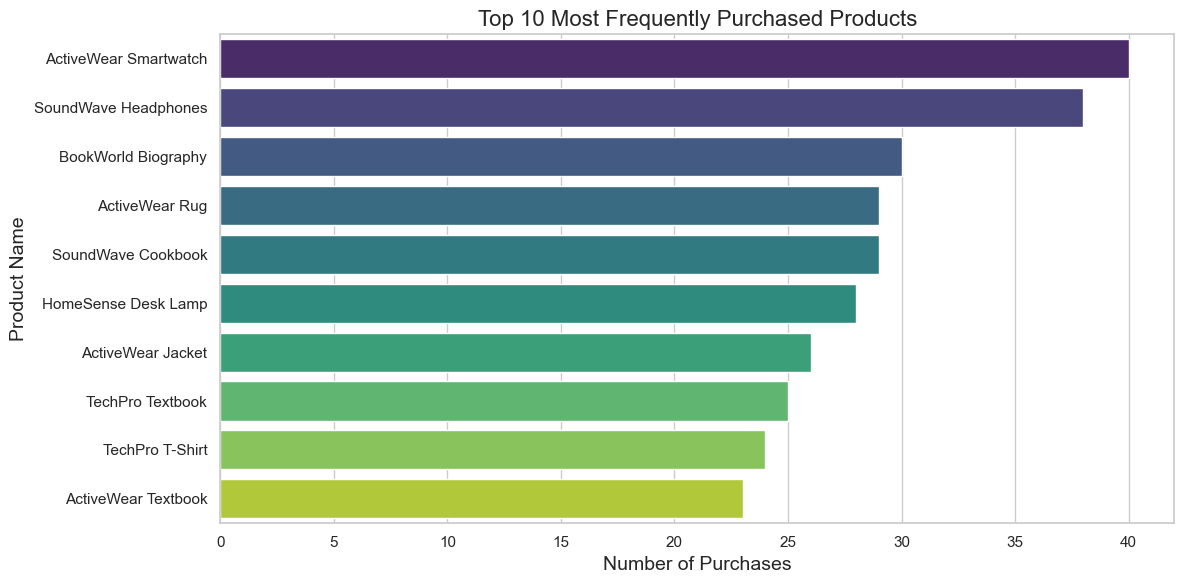

In [64]:
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
merged_data = transactions.merge(products, on='ProductID')
product_counts = merged_data['ProductName'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Products", fontsize=16)
plt.xlabel("Number of Purchases", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.tight_layout()
plt.show()
